# Single Output Regression

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from kaggle_secrets import UserSecretsClient
from pathlib import Path


# user_secrets = UserSecretsClient()
# wandb_key = user_secrets.get_secret("wandb_key")

SEED = 42
PATH = Path('../input/kdd-team/')
MAX_TIME = 3600

In [2]:
pub = pd.read_csv('../input/kdd-team/public.csv')
print(pub.shape)
pub.head()

(146262, 6)


,Filename,Altitude,Delta,North,East,kfold
0,00003e3b9e5336685200ae85d21b4f5e.jpg,178.829834,-0.065231,-0.386045,0.929772,0
1,0001261e2060303a06ba6c64d676d639.jpg,207.921478,-0.080688,0.635584,0.152819,2
2,0002ac0d783338cfeab0b2bdbd872cda.jpg,178.048431,0.021576,-1.228229,-0.499388,3
3,0004289ee1c7b8b08c77e19878106ae3.jpg,201.084625,0.505981,-1.739709,-0.699928,1
4,0004d0b59e19461ff126e3a08a814c33.jpg,187.550201,-0.328156,-0.169798,2.828752,0


In [3]:
def merge_pixels_dist(dataset='train', suffixes=['', '_a', '_a_est', '_h', '_h_est', '_p', '_p_est']):
    df_final = pub.copy()
    for s in suffixes:
        filename = 'pixels_dist_' + dataset + s + '.csv'
        df_right = pd.read_csv(PATH / filename)
        df_right.rename({'Images':'Filename'}, axis=1, inplace=True)
        df_final = df_final.merge(df_right, on='Filename', how='inner', suffixes=(None, s))
        print(df_final.shape)

    return df_final

In [4]:
train = merge_pixels_dist('train')
train.head()

(91231, 8)
(91231, 10)
(91231, 12)
(91231, 14)
(91231, 16)
(91231, 18)
(91231, 20)


,Filename,Altitude,Delta,North,East,kfold,North_pixel,East_pixel,North_pixel_a,East_pixel_a,North_pixel_a_est,East_pixel_a_est,North_pixel_h,East_pixel_h,North_pixel_h_est,East_pixel_h_est,North_pixel_p,East_pixel_p,North_pixel_p_est,East_pixel_p_est
0,00003e3b9e5336685200ae85d21b4f5e.jpg,178.829834,-0.065231,-0.386045,0.929772,0,-1.098183,2.828369,-1.296189,2.868935,-1.220466,2.826518,-1.098183,2.828369,-1.230324,2.838610,-1.296189,2.868935,-1.220466,2.826518
1,0001261e2060303a06ba6c64d676d639.jpg,207.921478,-0.080688,0.635584,0.152819,2,1.452448,0.207358,0.847966,0.356077,0.792500,0.231472,1.452448,0.207358,0.753004,0.217258,0.847966,0.356077,0.792500,0.231472
2,0002ac0d783338cfeab0b2bdbd872cda.jpg,178.048431,0.021576,-1.228229,-0.499388,3,-3.544215,-1.494362,-3.517452,-1.592591,-3.823705,-1.658855,-3.544215,-1.494362,-3.818374,-1.668158,-3.517452,-1.592591,-3.823705,-1.658855
3,0004289ee1c7b8b08c77e19878106ae3.jpg,201.084625,0.505981,-1.739709,-0.699928,1,-6.054061,-4.082150,-6.091535,-3.099275,-6.065357,-2.354155,-6.054061,-4.082150,-6.145322,-2.303187,-6.091535,-3.099275,-6.065357,-2.354155
4,0004d0b59e19461ff126e3a08a814c33.jpg,187.550201,-0.328156,-0.169798,2.828752,0,-0.690250,8.232869,-0.449659,8.125691,-0.564889,8.012415,-0.690250,8.232869,-0.555564,7.999658,-0.449659,8.125691,-0.564889,8.012415


In [5]:
test = merge_pixels_dist('test')
test.drop(['North', 'East'], axis=1, inplace=True)
test.head()

(55031, 8)
(55031, 10)
(55031, 12)
(55031, 14)
(55031, 16)
(55031, 18)
(55031, 20)


,Filename,Altitude,Delta,kfold,North_pixel,East_pixel,North_pixel_a,East_pixel_a,North_pixel_a_est,East_pixel_a_est,North_pixel_h,East_pixel_h,North_pixel_h_est,East_pixel_h_est,North_pixel_p,East_pixel_p,North_pixel_p_est,East_pixel_p_est
0,000053b1e684c9e7ea73727b2238ce18.jpg,167.943069,0.010269,0,3.946422,-3.815853,0.356597,0.257315,-0.654044,-1.042109,3.946422,-3.815853,5.856787,-8.512549,0.356597,0.257315,-0.654044,-1.042109
1,00029153d12ae1c9abe59c17ff2e0895.jpg,195.853088,0.089218,2,7.668228,-4.031865,9.366933,-2.493681,4.654472,-5.100857,7.668228,-4.031865,4.936895,-4.149510,9.366933,-2.493681,4.654472,-5.100857
2,0006246bee639c7a7b11a08e34dd3cc6.jpg,146.943466,-0.018326,1,-11.549439,-0.880645,-12.518370,-0.683746,-12.124315,-0.030847,-11.549439,-0.880645,-12.188266,0.273252,-12.518370,-0.683746,-12.124315,-0.030847
3,00063cb5da1826febf178b669eea3250.jpg,213.184418,-0.108704,1,-28.991636,1.930891,-25.942930,-0.682081,-21.449981,4.212570,-28.991636,1.930891,-21.237231,4.168302,-25.942930,-0.682081,-21.449981,4.212570
4,00063ece2e68a8847f228e8fd922f851.jpg,184.757767,0.017700,0,0.184479,-6.925782,-0.165511,-6.852798,0.008325,-6.209880,0.184479,-6.925782,0.003814,-6.179220,-0.165511,-6.852798,0.008325,-6.209880


In [6]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6caydcyi
  JVM stdout: /tmp/tmp6caydcyi/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6caydcyi/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_ia9p3q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.250 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [7]:
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
features = [f for f in train.columns if f not in ['Filename', 'North', 'East', 'kfold']]

def train_automl(train, test, target, max_runtime_secs=3600):
    
    aml = H2OAutoML(seed=SEED,
                    max_runtime_secs=max_runtime_secs,
                    stopping_metric='RMSE',
                    sort_metric='RMSE',
                    exploitation_ratio=0.1,
                    verbosity='info')

    aml.train(x=features, y=target, training_frame=train, )  
    
    train_preds = aml.leader.predict(train)
    train_preds.rename({'predict':target+'_prediction'})
    
    test_preds = aml.leader.predict(test)
    test_preds.rename({'predict':target+'_prediction'})
    
    return aml, train_preds, test_preds
    

In [9]:
north_aml, north_train_preds, north_test_preds = train_automl(train, test, 'North', MAX_TIME)
north_aml.leaderboard.head(20)

AutoML progress: |
00:53:49.489: Project: AutoML_1_20221031_05349
00:53:49.491: Blending will be used.
00:53:49.491: Setting stopping tolerance adaptively based on the training frame: 0.0033107682550761745
00:53:49.493: Build control seed: 42
00:53:49.502: Since cross-validation is disabled, and validation, blending frame(s) were not provided, automatically split the training data into training, validation, blending frame(s) in the ratio 70/10/20.
00:53:50.148: training frame: Frame key: AutoML_1_20221031_05349_training_Key_Frame__upload_9f6d439ad8662552d77f613b00f042ec.hex    cols: 20    rows: 63883  chunks: 9    size: 11894523  checksum: -4175895588245746392
00:53:50.154: validation frame: Frame key: AutoML_1_20221031_05349_validation_Key_Frame__upload_9f6d439ad8662552d77f613b00f042ec.hex    cols: 20    rows: 9162  chunks: 9    size: 1716417  checksum: 7857583928764237808
00:53:50.155: leaderboard frame: Frame key: AutoML_1_20221031_05349_validation_Key_Frame__upload_9f6d439ad8662552

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20221031_05349,0.323136,0.104417,0.148956,nan,0.104417
StackedEnsemble_BestOfFamily_2_AutoML_1_20221031_05349,0.323419,0.1046,0.148868,nan,0.1046
StackedEnsemble_BestOfFamily_1_AutoML_1_20221031_05349,0.327263,0.107101,0.154159,nan,0.107101
GBM_1_AutoML_1_20221031_05349,0.33762,0.113987,0.167617,nan,0.113987
XGBoost_1_AutoML_1_20221031_05349,0.343525,0.118009,0.159463,nan,0.118009
XGBoost_2_AutoML_1_20221031_05349,0.367142,0.134793,0.180832,nan,0.134793
DRF_1_AutoML_1_20221031_05349,0.380357,0.144671,0.162057,nan,0.144671
GBM_3_AutoML_1_20221031_05349,0.396576,0.157272,0.231785,nan,0.157272
GBM_4_AutoML_1_20221031_05349,0.411439,0.169282,0.257243,nan,0.169282
GBM_2_AutoML_1_20221031_05349,0.417805,0.174561,0.248449,nan,0.174561


In [10]:
east_aml, east_train_preds, east_test_preds = train_automl(train, test, 'East', MAX_TIME)
east_aml.leaderboard.head(20)

AutoML progress: |
00:54:34.588: Project: AutoML_2_20221031_05434
00:54:34.588: Blending will be used.
00:54:34.589: Setting stopping tolerance adaptively based on the training frame: 0.0033107682550761745
00:54:34.589: Build control seed: 42
00:54:34.589: Since cross-validation is disabled, and validation, blending frame(s) were not provided, automatically split the training data into training, validation, blending frame(s) in the ratio 70/10/20.
00:54:34.785: training frame: Frame key: AutoML_2_20221031_05434_training_Key_Frame__upload_9f6d439ad8662552d77f613b00f042ec.hex    cols: 20    rows: 63883  chunks: 9    size: 11894523  checksum: -4175895588245746392
00:54:34.794: validation frame: Frame key: AutoML_2_20221031_05434_validation_Key_Frame__upload_9f6d439ad8662552d77f613b00f042ec.hex    cols: 20    rows: 9162  chunks: 9    size: 1716417  checksum: 7857583928764237808
00:54:34.794: leaderboard frame: Frame key: AutoML_2_20221031_05434_validation_Key_Frame__upload_9f6d439ad8662552

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_2_AutoML_2_20221031_05434,0.320294,0.102588,0.14419,nan,0.102588
StackedEnsemble_AllModels_1_AutoML_2_20221031_05434,0.320678,0.102835,0.144415,nan,0.102835
StackedEnsemble_BestOfFamily_1_AutoML_2_20221031_05434,0.326219,0.106419,0.150529,nan,0.106419
XGBoost_1_AutoML_2_20221031_05434,0.337221,0.113718,0.154495,nan,0.113718
GBM_1_AutoML_2_20221031_05434,0.340298,0.115803,0.162736,nan,0.115803
DRF_1_AutoML_2_20221031_05434,0.356087,0.126798,0.150717,nan,0.126798
XGBoost_2_AutoML_2_20221031_05434,0.357663,0.127923,0.173528,nan,0.127923
GBM_4_AutoML_2_20221031_05434,0.367756,0.135244,0.203864,nan,0.135244
GBM_3_AutoML_2_20221031_05434,0.373875,0.139783,0.202913,nan,0.139783
GBM_2_AutoML_2_20221031_05434,0.393964,0.155207,0.224959,nan,0.155207


In [11]:
train_final = train.cbind(north_train_preds)
train_final = train_final.cbind(east_train_preds)
train_final.as_data_frame().to_csv('train_final.csv')

train_final.head(5)

Filename,Altitude,Delta,North,East,kfold,North_pixel,East_pixel,North_pixel_a,East_pixel_a,North_pixel_a_est,East_pixel_a_est,North_pixel_h,East_pixel_h,North_pixel_h_est,East_pixel_h_est,North_pixel_p,East_pixel_p,North_pixel_p_est,East_pixel_p_est,North_prediction,East_prediction
00003e3b9e5336685200ae85d21b4f5e.jpg,178.83,-0.0652313,-0.386045,0.929772,0,-1.09818,2.82837,-1.29619,2.86893,-1.22047,2.82652,-1.09818,2.82837,-1.23032,2.83861,-1.29619,2.86893,-1.22047,2.82652,-0.382476,0.888842
0001261e2060303a06ba6c64d676d639.jpg,207.921,-0.0806885,0.635584,0.152819,2,1.45245,0.207358,0.847966,0.356077,0.7925,0.231472,1.45245,0.207358,0.753004,0.217258,0.847966,0.356077,0.7925,0.231472,0.633915,0.160478
0002ac0d783338cfeab0b2bdbd872cda.jpg,178.048,0.0215759,-1.22823,-0.499388,3,-3.54421,-1.49436,-3.51745,-1.59259,-3.8237,-1.65885,-3.54421,-1.49436,-3.81837,-1.66816,-3.51745,-1.59259,-3.8237,-1.65885,-1.13904,-0.48216
0004289ee1c7b8b08c77e19878106ae3.jpg,201.085,0.505981,-1.73971,-0.699928,1,-6.05406,-4.08215,-6.09153,-3.09927,-6.06536,-2.35415,-6.05406,-4.08215,-6.14532,-2.30319,-6.09153,-3.09927,-6.06536,-2.35415,-1.95296,-0.837682
0004d0b59e19461ff126e3a08a814c33.jpg,187.55,-0.328156,-0.169798,2.82875,0,-0.69025,8.23287,-0.449659,8.12569,-0.564889,8.01241,-0.69025,8.23287,-0.555564,7.99966,-0.449659,8.12569,-0.564889,8.01241,-0.181308,2.71981


In [12]:
test_final = test.cbind(north_test_preds)
test_final = test_final.cbind(east_test_preds)
test_final.as_data_frame().to_csv('test_final.csv')

test_final

Filename,Altitude,Delta,kfold,North_pixel,East_pixel,North_pixel_a,East_pixel_a,North_pixel_a_est,East_pixel_a_est,North_pixel_h,East_pixel_h,North_pixel_h_est,East_pixel_h_est,North_pixel_p,East_pixel_p,North_pixel_p_est,East_pixel_p_est,North_prediction,East_prediction
000053b1e684c9e7ea73727b2238ce18.jpg,167.943,0.0102692,0,3.94642,-3.81585,0.356597,0.257315,-0.654044,-1.04211,3.94642,-3.81585,5.85679,-8.51255,0.356597,0.257315,-0.654044,-1.04211,-0.0813788,-0.354913
00029153d12ae1c9abe59c17ff2e0895.jpg,195.853,0.0892181,2,7.66823,-4.03186,9.36693,-2.49368,4.65447,-5.10086,7.66823,-4.03186,4.9369,-4.14951,9.36693,-2.49368,4.65447,-5.10086,1.03116,-0.640209
0006246bee639c7a7b11a08e34dd3cc6.jpg,146.943,-0.0183258,1,-11.5494,-0.880645,-12.5184,-0.683746,-12.1243,-0.0308469,-11.5494,-0.880645,-12.1883,0.273252,-12.5184,-0.683746,-12.1243,-0.0308469,-1.6744,0.0134703
00063cb5da1826febf178b669eea3250.jpg,213.184,-0.108704,1,-28.9916,1.93089,-25.9429,-0.682081,-21.45,4.21257,-28.9916,1.93089,-21.2372,4.1683,-25.9429,-0.682081,-21.45,4.21257,-1.29895,0.397777
00063ece2e68a8847f228e8fd922f851.jpg,184.758,0.0177002,0,0.184479,-6.92578,-0.165511,-6.8528,0.00832452,-6.20988,0.184479,-6.92578,0.00381415,-6.17922,-0.165511,-6.8528,0.00832452,-6.20988,0.0444692,-1.48739
000838c1249fec206b77360ff0adc110.jpg,209.136,-0.544525,1,2.54224,-2.43533,2.78873,-2.46239,3.46306,-2.61436,2.54224,-2.43533,3.48015,-2.62869,2.78873,-2.46239,3.46306,-2.61436,1.59287,-1.49153
000a8e84b013655b832041a6f362e5c9.jpg,177.72,-0.23024,4,-0.601386,-3.88556,-0.061612,-4.1541,-0.321557,-4.38535,-0.601386,-3.88556,-0.280671,-4.39763,-0.061612,-4.1541,-0.321557,-4.38535,-0.134649,-1.37513
000d0c74074191add6f22e0004db8f76.jpg,200.488,0.0812378,3,3.12172,-6.69092,2.78086,-5.82139,2.14271,-5.28396,3.12172,-6.69092,2.19983,-5.08691,2.78086,-5.82139,2.14271,-5.28396,0.785977,-2.03307
000dd3543ac84d906eae52e7c779bb2a.jpg,155.313,0.062027,4,-0.954504,-9.59106,-3.27656,-8.70192,-4.1014,-8.30099,-0.954504,-9.59106,-4.38984,-8.47304,-3.27656,-8.70192,-4.1014,-8.30099,-0.463512,-1.17267
00129b07887a18a7331909231c28816e.jpg,187.643,-0.133362,4,0.559739,4.16881,0.2546,4.49667,0.456218,4.28046,0.559739,4.16881,0.446538,4.31604,0.2546,4.49667,0.456218,4.28046,0.146631,1.34891


In [13]:
submission = test_final.as_data_frame()[['Filename', 'North_prediction', 'East_prediction']]
submission.rename({'North_prediction':'North', 'East_prediction':'East'}, axis=1, inplace=True)
submission = submission.melt(id_vars='Filename', value_name='Predicted')
submission['Id'] = submission.Filename + ':' + submission.variable
submission = submission[['Id', 'Predicted']]
submission.head()

,Id,Predicted
0,000053b1e684c9e7ea73727b2238ce18.jpg:North,-0.081379
1,00029153d12ae1c9abe59c17ff2e0895.jpg:North,1.031160
2,0006246bee639c7a7b11a08e34dd3cc6.jpg:North,-1.674396
3,00063cb5da1826febf178b669eea3250.jpg:North,-1.298955
4,00063ece2e68a8847f228e8fd922f851.jpg:North,0.044469


In [14]:
submission.to_csv('submission.csv', index=False)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20221031_05349,0.273011,0.0745349,0.123087,nan,0.0745349,1958,0.027904,StackedEnsemble
XGBoost_1_AutoML_1_20221031_05349,0.273833,0.0749846,0.124873,nan,0.0749846,4168,0.004379,XGBoost
StackedEnsemble_BestOfFamily_2_AutoML_1_20221031_05349,0.27666,0.0765407,0.123657,nan,0.0765407,1476,0.032669,StackedEnsemble
DRF_1_AutoML_1_20221031_05349,0.290268,0.0842557,0.110015,nan,0.0842557,2604,0.00109,DRF
XGBoost_2_AutoML_1_20221031_05349,0.292728,0.0856897,0.150866,nan,0.0856897,2923,0.002418,XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_1_20221031_05349,0.300055,0.090033,0.134227,nan,0.090033,2001,0.024874,StackedEnsemble
GBM_1_AutoML_1_20221031_05349,0.353249,0.124785,0.160639,nan,0.124785,12818,0.021216,GBM
GBM_3_AutoML_1_20221031_05349,0.407869,0.166357,0.229254,nan,0.166357,2007,0.004446,GBM
GBM_4_AutoML_1_20221031_05349,0.416788,0.173712,0.250754,nan,0.173712,1916,0.006317,GBM
GBM_2_AutoML_1_20221031_05349,0.432682,0.187214,0.246839,nan,0.187214,2081,0.003899,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

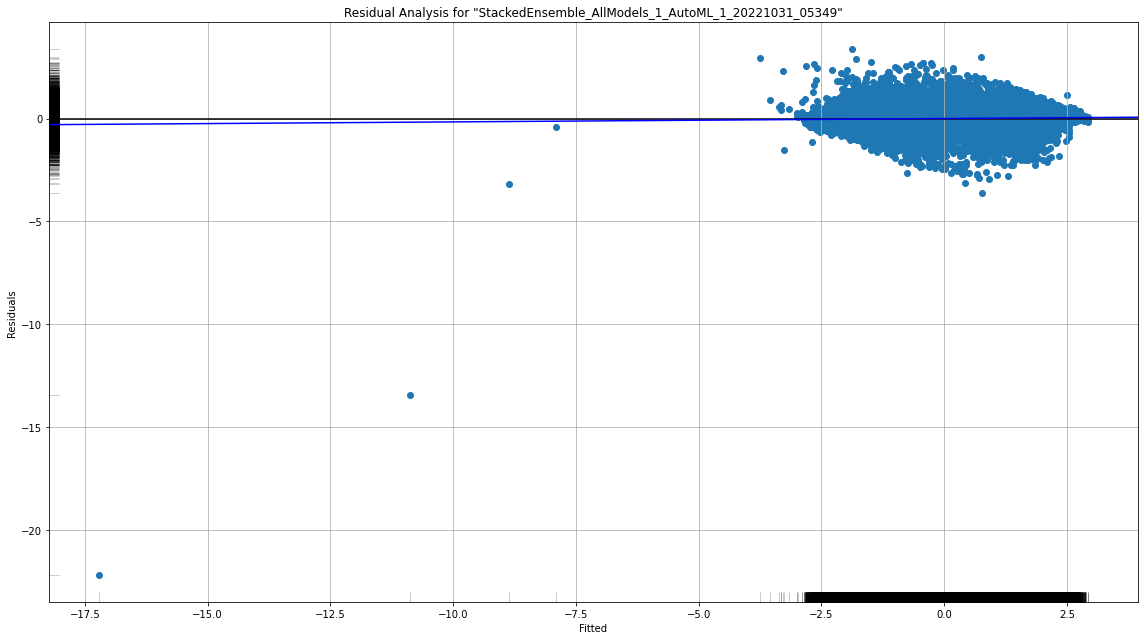

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

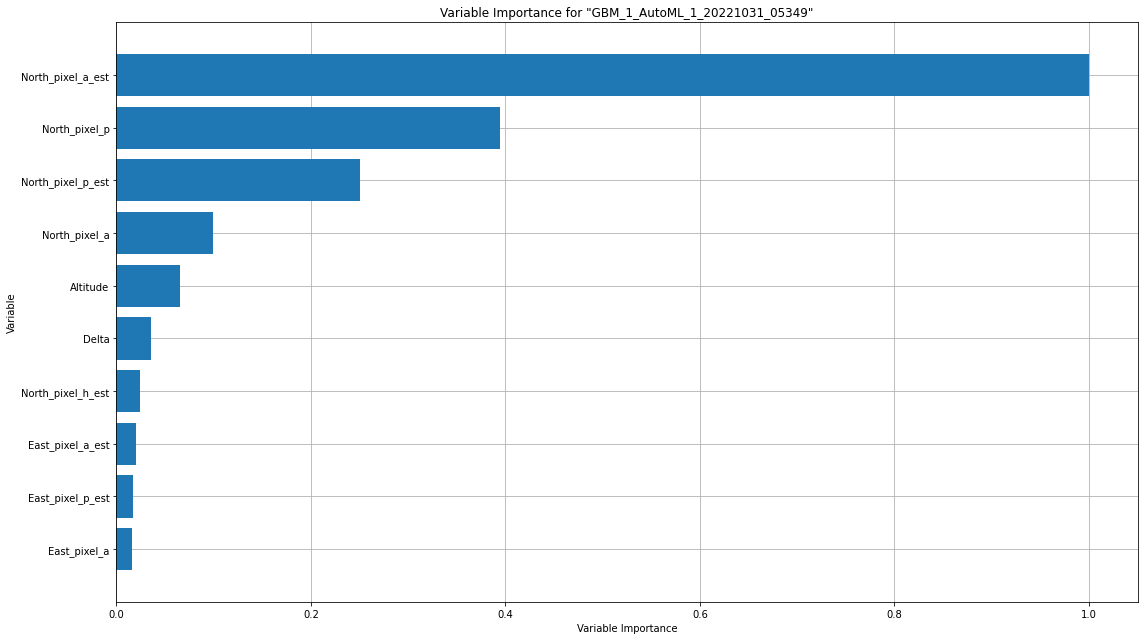

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

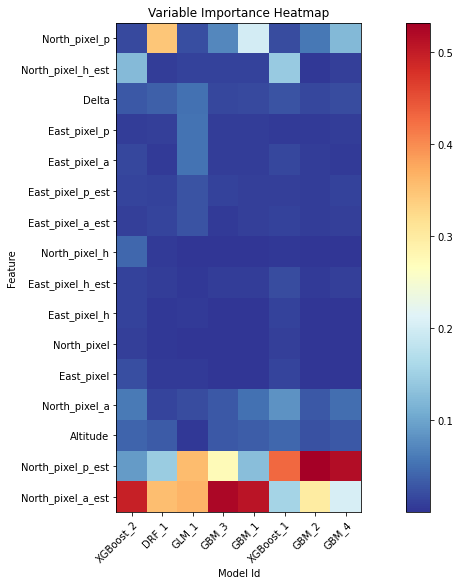

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

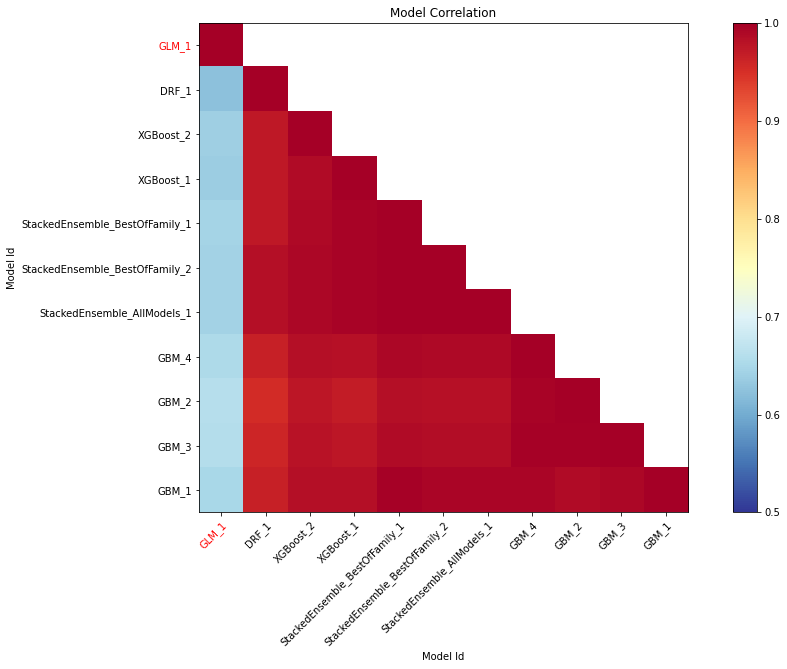

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

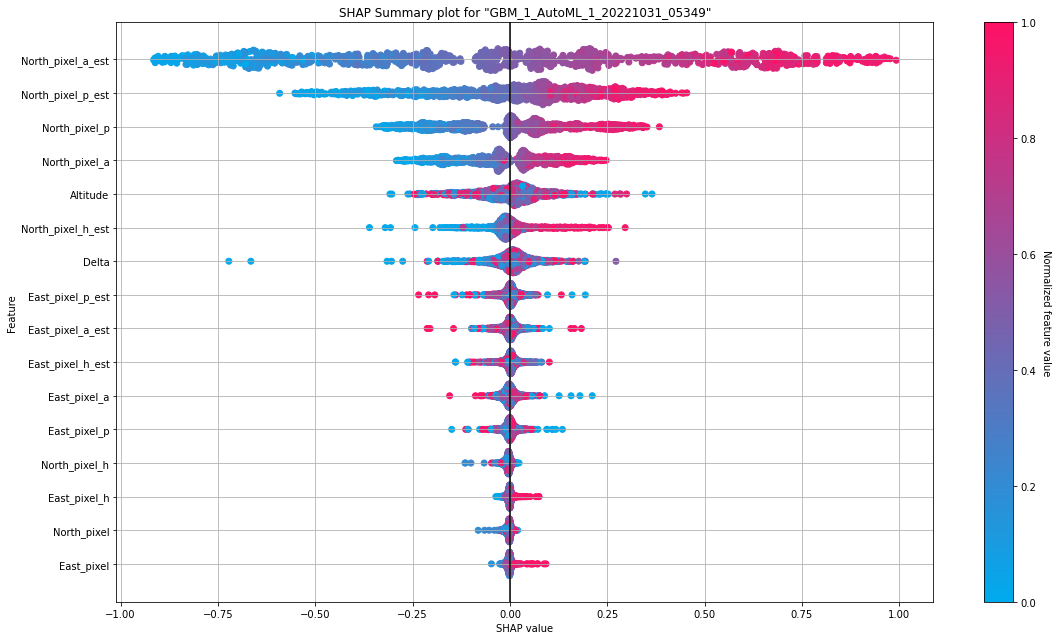

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_93adb2a6cec6084d5dc8352c79704039> was cancelled by the user.

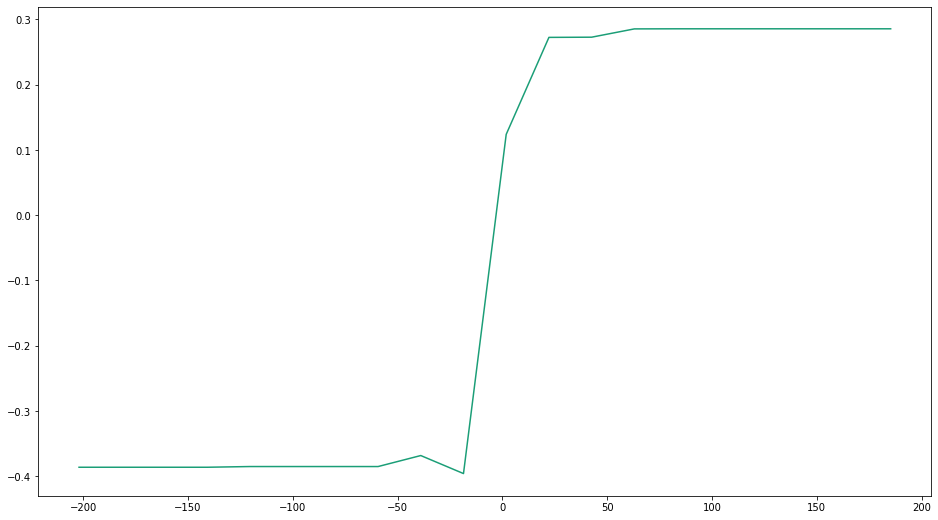

In [16]:
# north_aml.explain(train)

In [ ]:
# east_aml.explain(train)